Text(0, 0.5, 'Prices')

Text(0.5, 1.0, 'Original vs. risk-free')

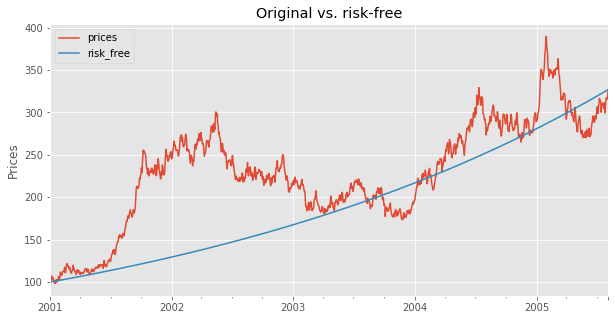

In [90]:
# %load removing_volatility.py
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# ============================================================================ #
# Preprocess data

data_df = pd.read_json('data.json')
data_df.index = pd.to_datetime(data_df.index)
data_df = data_df.asfreq('B')

# ============================================================================ #
# Create time series

equity_df = data_df['equity'].copy()
returns_df = data_df['returns'].copy()
prices_df = pd.DataFrame(data_df['prices'].copy())

# ============================================================================ #
# Compute the daily annualized return

number_days = len(data_df.index)
total_return = equity_df.tail(1).values[0]
a_T = np.power((1+total_return), 1.0/(number_days-1)) - 1

# ============================================================================ #
# Build the risk free price series
prices_df['risk_free'] = a_T

prices_df.loc[prices_df.index[0], 'risk_free'] = 0.0
prices_df['risk_free'] = prices_df['risk_free'].add(1.0).cumprod().mul(100)

ax = prices_df.plot(figsize=(10,5))
ax.grid(True)
ax.set_ylabel('Prices')
ax.set_title('Original vs. risk-free')

plt.savefig('original_vs_risk_free.png', dpi = 400, bbox_inches='tight', transparent=True)

# Generate series between the original and the risk free

In [91]:
def space_curves(eps, returns_df, annualized_ret):
    """
    Linear interpolation between the original returns
    and the annualized series.

    Parameters
    ----------
    eps: float

    returns_df: pd.DataFrame

    annualized_ret: float

    Returns
    -------
    pd.DataFrame
    """
    return returns_df * (1-eps) + eps * annualized_ret

space_curves_df = pd.DataFrame()
space_curves_df['original']  = returns_df 
space_curves_df['risk_free'] = a_T

N = 10
eps_space = np.linspace(0.1, 0.9, N)

for eps in eps_space:
    space_curves_df[eps] = space_curves(eps, returns_df, a_T)

space_curves_df.loc[space_curves_df.index[0], :] = 0.0
space_curves_df = space_curves_df.add(1.0).cumprod().mul(100)

Text(0, 0.5, 'Prices')

Text(0.5, 1.0, 'From the original price series to the risk free')

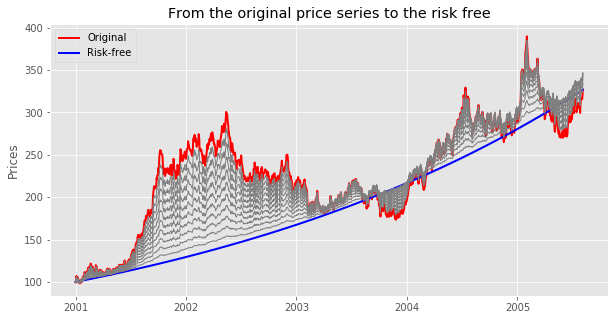

In [92]:
#%%
fig, ax = plt.subplots(figsize=(10,5))

# Original
ax.plot(space_curves_df.index, 
        space_curves_df['original'], 
        c = 'r', linewidth = 2.0, label = 'Original')

# Risk-free
ax.plot(space_curves_df.index, 
        space_curves_df['risk_free'], 
        c = 'b',linewidth = 2.0, label = 'Risk-free')

# Transition
ax.plot(space_curves_df.index, 
        space_curves_df.drop(columns = ['original', 'risk_free']), 
        c = 'grey', linewidth = 1.0)

ax.set_ylabel('Prices')
ax.set_title('From the original price series to the risk free')
ax.grid(True)
ax.legend()

plt.savefig('transition.png', dpi = 400, bbox_inches='tight', transparent=True)

[Text(0, 0.5, 'Last price'),
 Text(0.5, 1.0, 'Comparison across volatility reduction')]

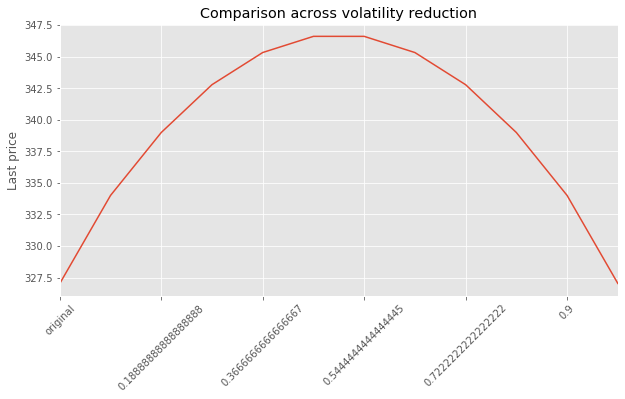

In [98]:
last_date = space_curves_df.index[-1]
last_values_s = space_curves_df.tail(1).loc[last_date]

# Reindex
new_index = ['original']
for eps in eps_space:
    new_index.extend([eps])
new_index.extend(['risk_free'])
last_values_s = last_values_s.reindex(new_index)
last_values_s = last_values_s.rename({'risk_free':'risk-free'})

ax = last_values_s.plot(figsize = (10,5))
ax.grid(True)
ax.set(ylabel = 'Last price', title='Comparison across volatility reduction')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
plt.savefig('last_price.png', dpi = 400, bbox_inches='tight', transparent=True)